<p align="center">
<img src="https://cdn.datacamp.com/main-app/assets/brand/datacamp-horizontal-rgb-b641f95b7bdd7560b554c761a0b4910f9619907dd823c0e41244ed72078723bf.svg" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Python for Excel Users**


Welcome to this live, hands-on training where you will learn how to upgrade from being an Excel user to using Python. 

In most organizations across all industries, data fluency, technical skills and a data-driven mindset are becoming sought after skills that drive organizational success in the digital age. This shift has spurred on the adoption of tools that go beyond Excel, which allow for more robust data analysis, visualization and presentation. In this notebook, you will learn:

* How to import Excel files into `pandas`.
* Filter, add new columns, and explore DataFrames.
* Apply common Excel operations such as pivot tables and VLOOKUP in Python.
* Present data as visualizations using `matplotlib` and `seaborn`.

The dataset to be used in this webinar is an Excel file named `sales_data_dirty.xlsx` - it contains 4 sheets, each containing the following columns:

<br>



![alt](https://github.com/adelnehme/python-for-excel-users-webinar/blob/master/image.png?raw=true)

## **Getting started with the dataset**

Similar to how you can download software (excel, tableau etc..) on your computer that allows you perform specific functions (data analysis, visualization ...) - Python has packages or modules that we download and install that allows to perform a set of tasks. We can also set aliases for these packages to shorten their name and make calling them more convenient.

In [60]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Import the data
data = pd.ExcelFile('https://github.com/adelnehme/python-for-excel-users-webinar/blob/master/sales_data_dirty.xlsx?raw=true')

In [62]:
# Print the name of the sheets
print(data.sheet_names)

['sales', 'customers', 'dates', 'employees']


In [63]:
# Parse sales data
sales = data.parse('sales')
# Print dimensions and glimpse
print(sales.shape)
sales.head(5)

(31465, 5)


,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
0,43659,23153.2339,12,0,5
1,43660,1457.3288,2,0,5
2,43661,36865.8012,15,0,5
3,43662,32474.9324,22,0,5
4,43663,472.3108,1,0,5


In [64]:
# Parse customers data 
customers = data.parse('customers')
# Print dimensions and glimpse
print(customers.shape)
customers.head(5)

(31465, 6)


,SalesOrderID,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType
0,43659,NaN,NaN,Tsvi,Reiter,NaN
1,43660,NaN,NaN,Tsvi,Reiter,NaN
2,43661,NaN,NaN,José,Saraiva,NaN
3,43662,NaN,NaN,José,Saraiva,NaN
4,43663,NaN,NaN,Linda,Mitchell,NaN


In [65]:
# Parse dates data
dates = data.parse('dates')
# Print dimensions and glimpse
print(dates.shape)
dates.head(5)

(31465, 3)


,SalesOrderID,OrderDate,ShipDate
0,43659,2011-05-31 00:00:00,2011-06-07 00:00:00
1,43660,2011-05-31 00:00:00,2011-06-07 00:00:00
2,43661,2011-05-31 00:00:00,2011-06-07 00:00:00
3,43662,2011-05-31 00:00:00,2011-06-07 00:00:00
4,43663,2011-05-31 00:00:00,2011-06-07 00:00:00


In [66]:
# Parse employees data
employees = data.parse('employees')
# Print dimensions and glimpse
print(employees.shape)
employees.head()

(17, 5)


,FirstName,LastName,CountryCode,RegionName,CommissionPct
0,Amy,Alberts,GB,United Kingdom,0.000
1,David,Campbell,US,Northwest,0.012
2,Garrett,Vargas,CA,Canada,0.010
3,Jae,Pak,CA,Canada,0.020
4,Jillian,Carson,US,Southwest,0.015


## **Better understanding our data**


Some important and common methods needed to get a better understanding of DataFrames are the following: 

- `.info()` provides a bird's eye view of column data types and missing values
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.unique()` gives out the number of unique values in a column

In [67]:
# Understand missingness of sales data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SalesOrderID     31465 non-null  int64  
 1   TotalDue         31465 non-null  float64
 2   NumberofItems    31465 non-null  int64  
 3   OnlineOrderFlag  31465 non-null  int64  
 4   Status           31465 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.2 MB


In [68]:
# Understand distribution of sales data
sales.describe()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
count,31465.000000,31465.000000,31465.000000,31465.000000,31465.0
mean,59391.000000,3915.995109,3.855617,0.879040,5.0
std,9083.307446,12515.462713,7.214877,0.326086,0.0
min,43659.000000,1.518300,1.000000,0.000000,5.0
25%,51525.000000,62.951900,1.000000,1.000000,5.0
50%,59391.000000,865.204000,2.000000,1.000000,5.0
75%,67257.000000,2615.490800,3.000000,1.000000,5.0
max,75123.000000,187487.825000,72.000000,1.000000,5.0


In [69]:
# Make sure Status column has no other unique values
print(sales['Status'].unique())
print(sales['OnlineOrderFlag'].unique())

[5]
[0 1]


In [70]:
# Understand column types of dates and missingness
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalesOrderID  31465 non-null  int64 
 1   OrderDate     31465 non-null  object
 2   ShipDate      31465 non-null  object
dtypes: int64(1), object(2)
memory usage: 737.6+ KB


In [71]:
# Let's understand the degree of missingness in customers dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesOrderID       31465 non-null  int64 
 1   CustomerFirstName  17463 non-null  object
 2   CustomerLastName   17463 non-null  object
 3   EmployeeFirstName  3806 non-null   object
 4   EmployeeLastName   3806 non-null   object
 5   ChannelType        17463 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [72]:
# How to find missing values?
customers.isna().sum()

SalesOrderID             0
CustomerFirstName    14002
CustomerLastName     14002
EmployeeFirstName    27659
EmployeeLastName     27659
ChannelType          14002
dtype: int64

## **Making our data analysis ready**


In [73]:
# Drop status column from sales
sales.drop('Status', axis=1, inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SalesOrderID     31465 non-null  int64  
 1   TotalDue         31465 non-null  float64
 2   NumberofItems    31465 non-null  int64  
 3   OnlineOrderFlag  31465 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 983.4 KB


***A note on dictionaries***

Dictionaries are useful data structures in Python with the following format `my_dictionary = {key: value}` where a key is mapped to a value and whose value can be returned with `my_dictionary[key]`.


In [74]:
# Example
names = {'first_name':'Adel',
         'last_name': 'Nehme'}

names['first_name']

'Adel'

In [75]:
# Replace OnlineOrderFlag to offline and online
sales['OnlineOrderFlag'] = sales['OnlineOrderFlag'].replace({0: 'offline',
                                                             1: 'online'})

# Make sure it is the case
print(sales['OnlineOrderFlag'].unique())

['offline' 'online']


In [76]:
# Convert data columns to datetime while keeping only Y,m,d
dates['OrderDate'] = pd.to_datetime(dates['OrderDate'], format='%Y-%m-%d')
dates['ShipDate'] = pd.to_datetime(dates['ShipDate'], format='%Y-%m-%d')


In [77]:
# Make sure now into datetime
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SalesOrderID  31465 non-null  int64         
 1   OrderDate     31465 non-null  datetime64[ns]
 2   ShipDate      31465 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 737.6 KB


In [78]:
# Impute missing values based on key business assumptions
customers.loc[customers['EmployeeFirstName'].isnull(), 'ChannelType'] = 'B2C'
customers.loc[customers['EmployeeFirstName'].notnull(), 'ChannelType'] = 'B2B'

In [79]:
# Make sure no more missing data in ChannelType
customers.isna().sum()

SalesOrderID             0
CustomerFirstName    14002
CustomerLastName     14002
EmployeeFirstName    27659
EmployeeLastName     27659
ChannelType              0
dtype: int64

In [80]:
# Combine first and last name in customers
customers['FullName'] = customers['EmployeeFirstName'] + ' ' + customers['EmployeeLastName']
customers.head()

,SalesOrderID,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,FullName
0,43659,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
1,43660,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
2,43661,NaN,NaN,José,Saraiva,B2B,José Saraiva
3,43662,NaN,NaN,José,Saraiva,B2B,José Saraiva
4,43663,NaN,NaN,Linda,Mitchell,B2B,Linda Mitchell


In [81]:
# Combine first and last name in employees
employees['FullName'] = employees['FirstName'] + ' ' + employees['LastName']
employees.head()


,FirstName,LastName,CountryCode,RegionName,CommissionPct,FullName
0,Amy,Alberts,GB,United Kingdom,0.000,Amy Alberts
1,David,Campbell,US,Northwest,0.012,David Campbell
2,Garrett,Vargas,CA,Canada,0.010,Garrett Vargas
3,Jae,Pak,CA,Canada,0.020,Jae Pak
4,Jillian,Carson,US,Southwest,0.015,Jillian Carson


### Q&A time!

## **Case studies**

### _Q1: How did we do in revenue over the years?_

Since we have revenue data for each `SalesOrderID` in the `sales` sheet - and the order date and ship date for each `SalesOrderID` in hte `dates` sheet - we want to combine both DataFrames similar to how a VLOOKUP would work. 

<br>

<p align="center">
<img src="https://github.com/adelnehme/python-for-excel-users-webinar/blob/master/pivots.png?raw=True" alt = "pivot" width="70%">
</p>

<br><br>

In more technical terms, we want to perform of left join of both DataFrames where `SalesOrderId` is a common column between them.


<p align="center">
<img src="https://github.com/adelnehme/python-for-excel-users-webinar/blob/master/left_join.png?raw=True" alt = "DataCamp icon" width="50%">
</p>





An example of how to merge a DataFrame in pandas is included below with the `.merge()` method, where we are merging `df_2` into `df_1` on a common column between them called `common_column`. The `how` argument determines which DataFrame to preserve - in this case it's `df_1` since it's on the **left**. This has the same logic as SQL joins as well.

`df_1.merge(df_2, on = 'common_column', how = 'left')`


In [82]:
# Merge data - the VLOOKUP of Excel
sales_date = sales.merge(dates, on='SalesOrderID', how='left')
sales_date.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07
2,43661,36865.8012,15,offline,2011-05-31,2011-06-07
3,43662,32474.9324,22,offline,2011-05-31,2011-06-07
4,43663,472.3108,1,offline,2011-05-31,2011-06-07


In [83]:
# Create column for year and month
sales_date['Order_Year'] = sales_date['OrderDate'].dt.year
sales_date['Order_YM'] = sales_date['OrderDate'].dt.strftime('%Y-%m')
sales_date.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate,Order_Year,Order_YM
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07,2011,2011-05
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07,2011,2011-05
2,43661,36865.8012,15,offline,2011-05-31,2011-06-07,2011,2011-05
3,43662,32474.9324,22,offline,2011-05-31,2011-06-07,2011,2011-05
4,43663,472.3108,1,offline,2011-05-31,2011-06-07,2011,2011-05


To calculate the total revenue per year, we need to perform something like a PIVOT TABLE in Excel. In pandas, there's a variety of ways to acheive this - there is even a `.pivot_table()` method. However we will be using instead the `.groupby()` method which takes in as argument the column name being grouped by, and can be chained with other methods to compute interesting statistics. Here's an example of grouping by the column `col_A` of the example DataFrame `df_1` and computing the sum of the remaining columns:

`df_1.groupby('col_A').sum()`

In [84]:
# Extract revenue by year
sales_by_year = sales_date.groupby('Order_Year').sum().reset_index()
sales_by_year

,Order_Year,SalesOrderID,TotalDue,NumberofItems
0,2011,71450434,1.415570e+07,5716
1,2012,184878045,3.767570e+07,21689
2,2013,798042413,4.896589e+07,56573
3,2014,814366923,2.241950e+07,37339


There are many ways to perform visualizations in Python - the two most widely used visualization packages are `seaborn` (which is usually imported as `sns`) and `matplotlib.pyplot` (which is usually imported as `plt`). 

Without going into the details, we will be creating and customizing two types of visualizations in this notebook by using these functions:

- Barplots using `sns.barplot(x=,y=,data=)`
  - `x`: The column name to be used on the x-axis.
  - `y`: The column name to be used on the y-axis.
  - `data`: The data used to visualize
- Lineplots using `sns.lineplot(x=,y=,data=)`
  - `x`: The column name to be used on the x-axis.
  - `y`: The column name to be used on the y-axis.
  - `data`: The data used to visualize
- Setting figure labels by:
  - `plt.xlabel()` to set the x-axis label.
  - `plt.ylabel()` to set the y-axis label.
  - `plt.title()` to set the x-axis label.
  - `plt.xticks(rotation=)` to set the x-axis ticks with proper rotation
- Showing the plot with `plt.show()`

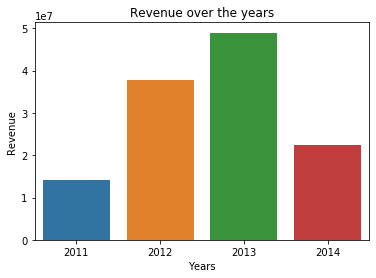

In [85]:
# Visualize it
sns.barplot(x='Order_Year', y='TotalDue', data=sales_by_year)
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.title('Revenue over the years')
plt.show()

In [86]:
# Is there seasonality?
sales_by_year_month = sales_date.groupby('Order_YM').sum().reset_index()
sales_by_year_month.head()

,Order_YM,SalesOrderID,TotalDue,NumberofItems,Order_Year
0,2011-05,1878240,5.670209e+05,357,86473
1,2011-06,6171852,5.070965e+05,141,283551
2,2011-07,10154298,2.292183e+06,941,464541
3,2011-08,11049625,2.800576e+06,1242,502750
4,2011-09,6971114,5.547916e+05,157,315727


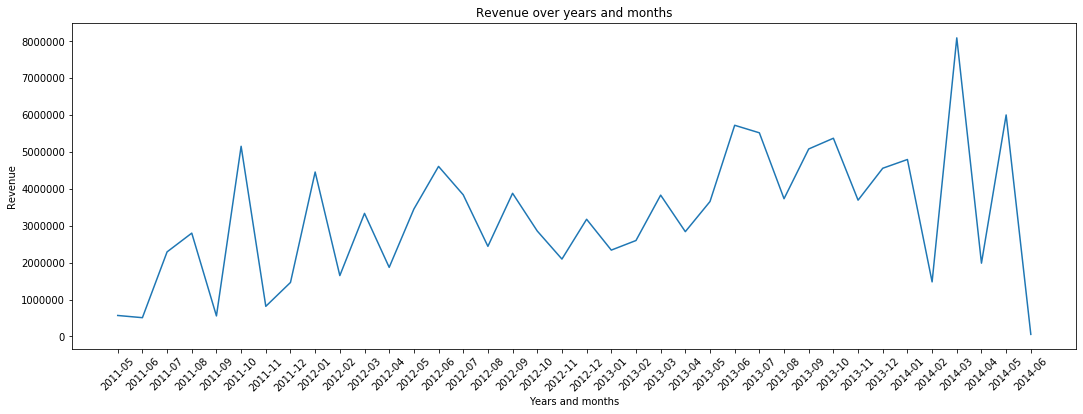

In [87]:
# Visualize it
plt.figure(figsize=(18,6))
sns.lineplot(x='Order_YM', y='TotalDue', data=sales_by_year_month)
plt.xlabel('Years and months')
plt.ylabel('Revenue')
plt.title('Revenue over years and months')
plt.xticks(rotation=45)
plt.show()

### _Q2: How is revenue divided by channel type overall and over time?_

Similar to how we merged the `sales` sheet with the `dates` sheet when answering Q1, we will be merging the `sales` sheet with the `customers` sheet to get the channel type, employee and customer names for each `SalesOrderID`.

<br>

<p align="center">
<img src="https://github.com/adelnehme/python-for-excel-users-webinar/blob/master/pivots2.png?raw=True" alt = "pivot" width="70%">
</p>

<br>

In [88]:
# Merge sales and customer data
sales_customers = sales.merge(customers, on='SalesOrderID', how='left')
sales_customers.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,FullName
0,43659,23153.2339,12,offline,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
1,43660,1457.3288,2,offline,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
2,43661,36865.8012,15,offline,NaN,NaN,José,Saraiva,B2B,José Saraiva
3,43662,32474.9324,22,offline,NaN,NaN,José,Saraiva,B2B,José Saraiva
4,43663,472.3108,1,offline,NaN,NaN,Linda,Mitchell,B2B,Linda Mitchell


In [89]:
# Identify revenue and amount sold by channel
sales_by_channel = sales_customers.groupby('ChannelType').sum().reset_index()
sales_by_channel.head()

,ChannelType,SalesOrderID,TotalDue,NumberofItems
0,B2B,204462343,9.077545e+07,60919
1,B2C,1664275472,3.244134e+07,60398


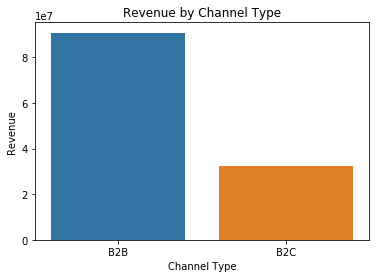

In [90]:
# Visualize
sns.barplot(x='ChannelType', y='TotalDue', data=sales_by_channel)
plt.xlabel('Channel Type')
plt.ylabel('Revenue')
plt.title('Revenue by Channel Type')
plt.show()

In [91]:
# Merge sales, dates and customers data
sales_customers_date = sales_date.merge(customers, on='SalesOrderID', how='left')
sales_customers_date.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate,Order_Year,Order_YM,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,FullName
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
2,43661,36865.8012,15,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva
3,43662,32474.9324,22,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva
4,43663,472.3108,1,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Linda,Mitchell,B2B,Linda Mitchell


In [92]:
# Group by year by channel type
sales_by_channel_date = sales_customers_date.groupby(['Order_Year', 'ChannelType']).sum().reset_index()
sales_by_channel_date

,Order_Year,ChannelType,SalesOrderID,TotalDue,NumberofItems
0,2011,B2B,17999103,9.886952e+06,4515
1,2011,B2C,53451331,4.268748e+06,1201
2,2012,B2B,55440422,3.061409e+07,18946
3,2012,B2C,129437623,7.061613e+06,2743
4,2013,B2B,87767978,3.710689e+07,27614
5,2013,B2C,710274435,1.185900e+07,28959
6,2014,B2B,43254840,1.316752e+07,9844
7,2014,B2C,771112083,9.251977e+06,27495


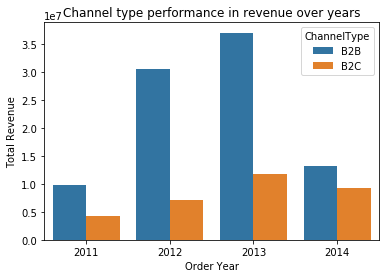

In [93]:
# Visualize
sns.barplot(x='Order_Year', y='TotalDue', data=sales_by_channel_date, hue='ChannelType')
plt.xlabel('Order Year')
plt.ylabel('Total Revenue')
plt.title('Channel type performance in revenue over years')
plt.show()

### _Q3: Who are the employees responsible for the most B2B sales overall and in 2013?_

The `sales_customers_date` has already been created when we merged `sales` with `customers` and `dates` in Q1 and Q2

```py
# From Q1
sales_date = sales.merge(dates, on="SalesOrderID", how = "left")
# From Q2
sales_customers_date = sales_date.merge(customers, on = "SalesOrderID", how = "left")
```

In [94]:
# Group by employee performance
sales_employees = sales_customers_date.groupby('FullName').sum().reset_index()
sales_employees.head()

,FullName,SalesOrderID,TotalDue,NumberofItems,Order_Year
0,Amy Alberts,2155978,8.264175e+05,586,78503
1,David Campbell,9966638,4.207895e+06,2247,380364
2,Garrett Vargas,12415186,4.069422e+06,3284,470937
3,Jae Pak,19195780,9.585125e+06,6738,700480
4,Jillian Carson,24928694,1.134239e+07,7825,951928


To be able to truly see the highest earning employees - we can use the `.sort_values()` method of a DataFrame. For example, we can sort `col_A` of the example DataFrame `df_1` as such:

`df_1.sort_values(by=,ascending=,inplace=)`

* `by` takes in the column name being sorted by
* `ascending` takes in `True` or `False` depending on whether we want to sort it by ascending order
* `inplace` takes in `True` or `False` depending on whether we want to save our changes in the same DataFrame being sorted.

In [95]:
# Sort it so we visualize it correctly
sales_employees.sort_values('TotalDue', ascending=True, inplace=True)
sales_employees.head()

,FullName,SalesOrderID,TotalDue,NumberofItems,Order_Year
14,Syed Abbas,964779,1.955288e+05,245,32212
0,Amy Alberts,2155978,8.264175e+05,586,78503
13,Stephen Jiang,2516344,1.235934e+06,792,96602
7,Lynn Tsoflias,6663235,1.606441e+06,1468,219460
10,Rachel Valdez,7870176,2.062393e+06,1783,261734


<function matplotlib.pyplot.show(*args, **kw)>

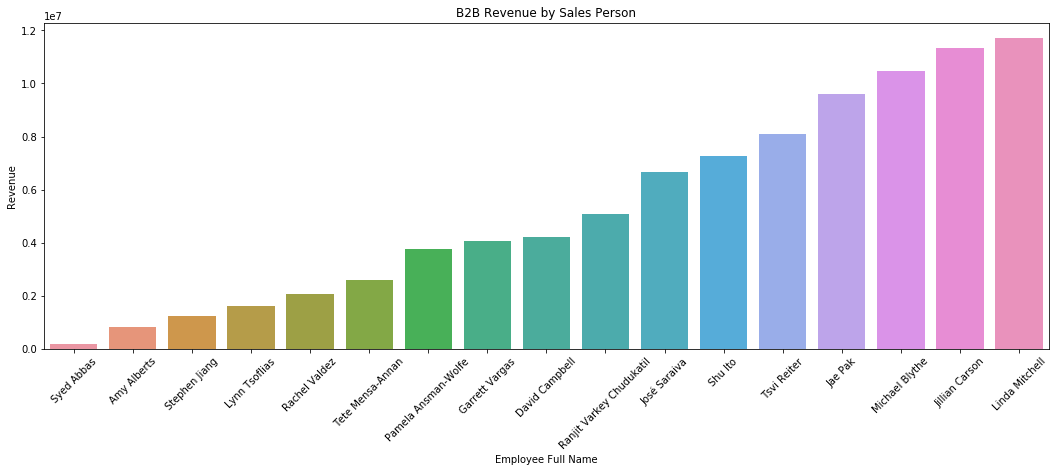

In [96]:
# Visualize
plt.figure(figsize=(18,6))
sns.barplot(x='FullName', y='TotalDue', data=sales_employees)
plt.xlabel('Employee Full Name')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.title('B2B Revenue by Sales Person')
plt.show

In [97]:
# Group by employee performance and year
sales_employees = sales_customers_date.groupby(['FullName', 'Order_Year']).sum().reset_index()
sales_employees.head()

,FullName,Order_Year,SalesOrderID,TotalDue,NumberofItems
0,Amy Alberts,2012,335313,1.306670e+05,103
1,Amy Alberts,2013,1618710,6.320026e+05,453
2,Amy Alberts,2014,201955,6.374784e+04,30
3,David Campbell,2011,1242002,6.756637e+05,220
4,David Campbell,2012,2978792,1.453583e+06,741


In [98]:
# Sort to make it easier to visualize
sales_employees.sort_values(['Order_Year', 'TotalDue'], ascending=True, inplace=True)
sales_employees.head()

,FullName,Order_Year,SalesOrderID,TotalDue,NumberofItems
45,Stephen Jiang,2011,176971,32567.9155,17
7,Garrett Vargas,2011,1329262,563326.5478,284
3,David Campbell,2011,1242002,675663.6940,220
32,Pamela Ansman-Wolfe,2011,974811,730273.4889,273
28,Michael Blythe,2011,2882387,986298.0902,623


In [99]:
# Who was the best last year?
sales_employees_2013 = sales_employees[sales_employees['Order_Year'] == 2013]
sales_employees_2013.tail()

,FullName,Order_Year,SalesOrderID,TotalDue,NumberofItems
39,Ranjit Varkey Chudukatil,2013,5202966,2.987334e+06,1984
16,Jillian Carson,2013,10134024,3.827980e+06,3208
30,Michael Blythe,2013,9513303,4.490942e+06,3065
12,Jae Pak,2013,9270298,4.630339e+06,3343
24,Linda Mitchell,2013,8824836,4.637218e+06,3101


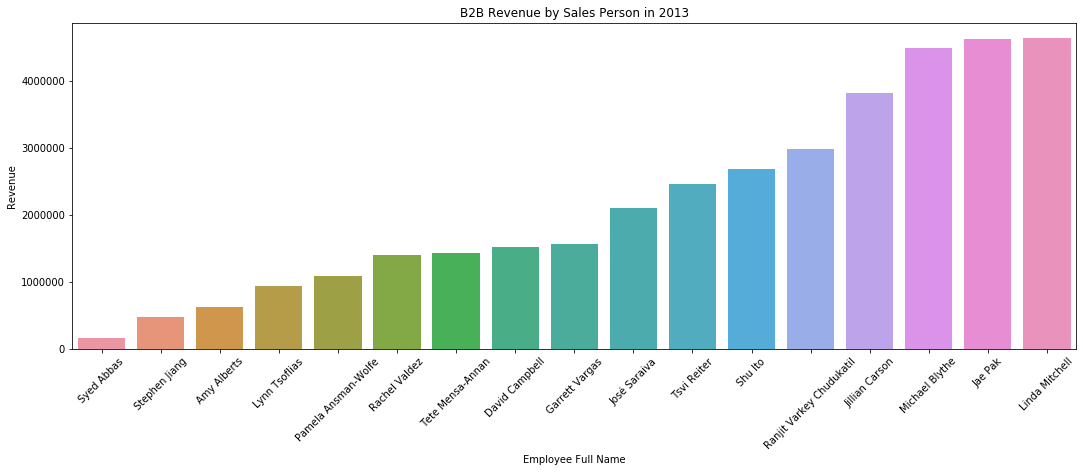

In [100]:
# Visualize
plt.figure(figsize=(18,6))
sns.barplot(x='FullName', y='TotalDue', data=sales_employees_2013)
plt.xlabel('Employee Full Name')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.title('B2B Revenue by Sales Person in 2013')
plt.show()

### Q&A time!

### _Take-home question: Who were the highest earning (in compensation) employees in 2012?_

**Clues:**
- Compensation = Sales generated * Commission
- You need to use the all four sheets
- Sort your results by the amount of commission earned 

**Bonus points if:**
- You make your chart extra pretty
- Use syntax not covered in this session

**Submission details:**
- Share with us a code snippet with your output on LinkedIn, Twitter or Facebook
- Tag us on `@DataCamp` with the hashtag `#datacamplive`


In [101]:
employees['FullName'] = employees['FirstName'] + ' ' + employees['LastName']
employees.head()

,FirstName,LastName,CountryCode,RegionName,CommissionPct,FullName
0,Amy,Alberts,GB,United Kingdom,0.000,Amy Alberts
1,David,Campbell,US,Northwest,0.012,David Campbell
2,Garrett,Vargas,CA,Canada,0.010,Garrett Vargas
3,Jae,Pak,CA,Canada,0.020,Jae Pak
4,Jillian,Carson,US,Southwest,0.015,Jillian Carson


In [102]:
sales_customers_date_employees = sales_customers_date.merge(employees, on='FullName', how='left')
sales_customers_date_employees.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate,Order_Year,Order_YM,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,FullName,FirstName,LastName,CountryCode,RegionName,CommissionPct
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter,Tsvi,Reiter,US,Southeast,0.010
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter,Tsvi,Reiter,US,Southeast,0.010
2,43661,36865.8012,15,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva,José,Saraiva,GB,United Kingdom,0.015
3,43662,32474.9324,22,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva,José,Saraiva,GB,United Kingdom,0.015
4,43663,472.3108,1,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Linda,Mitchell,B2B,Linda Mitchell,Linda,Mitchell,US,Southwest,0.015


In [103]:
sales_customers_date_employees['Compensation'] = sales_customers_date_employees['TotalDue'] * sales_customers_date_employees['CommissionPct']
sales_customers_date_employees.head()

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate,Order_Year,Order_YM,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,FullName,FirstName,LastName,CountryCode,RegionName,CommissionPct,Compensation
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter,Tsvi,Reiter,US,Southeast,0.010,231.532339
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter,Tsvi,Reiter,US,Southeast,0.010,14.573288
2,43661,36865.8012,15,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva,José,Saraiva,GB,United Kingdom,0.015,552.987018
3,43662,32474.9324,22,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,José,Saraiva,B2B,José Saraiva,José,Saraiva,GB,United Kingdom,0.015,487.123986
4,43663,472.3108,1,offline,2011-05-31,2011-06-07,2011,2011-05,NaN,NaN,Linda,Mitchell,B2B,Linda Mitchell,Linda,Mitchell,US,Southwest,0.015,7.084662


In [104]:
compensation_employees = sales_customers_date_employees.groupby(['Order_Year', 'FullName']).sum().reset_index()
compensation_employees.head()

,Order_Year,FullName,SalesOrderID,TotalDue,NumberofItems,CommissionPct,Compensation
0,2011,David Campbell,1242002,6.756637e+05,220,0.336,8107.964328
1,2011,Garrett Vargas,1329262,5.633265e+05,284,0.300,5633.265478
2,2011,Jillian Carson,2616676,1.477158e+06,785,0.885,22157.374216
3,2011,José Saraiva,2479533,1.323329e+06,704,0.840,19849.929519
4,2011,Linda Mitchell,2040472,1.294820e+06,475,0.690,19422.296159


In [105]:
compensation_employees.sort_values(['Order_Year', 'Compensation'], ascending=True, inplace=True)
compensation_employees.head()

,Order_Year,FullName,SalesOrderID,TotalDue,NumberofItems,CommissionPct,Compensation
8,2011,Stephen Jiang,176971,3.256792e+04,17,0.000,0.000000
1,2011,Garrett Vargas,1329262,5.633265e+05,284,0.300,5633.265478
6,2011,Pamela Ansman-Wolfe,974811,7.302735e+05,273,0.220,7302.734889
0,2011,David Campbell,1242002,6.756637e+05,220,0.336,8107.964328
7,2011,Shu Ito,1464510,1.089874e+06,477,0.330,10898.743906


In [106]:
compensation_employees_2012 = compensation_employees[compensation_employees['Order_Year'] == 2012]
compensation_employees_2012.head()

,Order_Year,FullName,SalesOrderID,TotalDue,NumberofItems,CommissionPct,Compensation
10,2012,Amy Alberts,335313,1.306670e+05,103,0.000,0.000000
21,2012,Stephen Jiang,1036258,5.161974e+05,290,0.000,0.000000
22,2012,Tete Mensa-Annan,1165317,4.972852e+05,375,0.456,9448.418521
18,2012,Pamela Ansman-Wolfe,2097297,1.361053e+06,791,0.450,13610.533634
12,2012,Garrett Vargas,3784606,1.448036e+06,1094,0.800,14480.355253


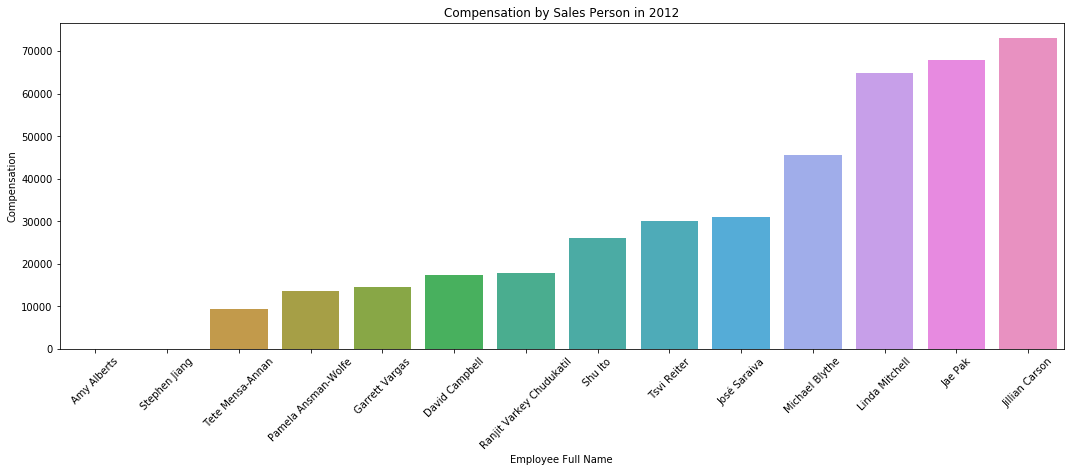

In [107]:
plt.figure(figsize=(18,6))
sns.barplot(x='FullName', y='Compensation', data=compensation_employees_2012)
plt.xlabel('Employee Full Name')
plt.xticks(rotation=45)
plt.ylabel('Compensation')
plt.title('Compensation by Sales Person in 2012')
plt.show()